Found 2527 images belonging to 3 classes.
Found 631 images belonging to 3 classes.

✅ Class Indices: {'overripe': 0, 'ripe': 1, 'unripe': 2}
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.6909 - loss: 0.7342

79/79 ━━━━━━━━━━━━━━━━━━━━ 781s 10s/step - accuracy: 0.6921 - loss: 0.7316 - val_accuracy: 0.7892 - val_loss: 0.4713
Epoch 2/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.8852 - loss: 0.2961 - val_accuracy: 0.7639 - val_loss: 0.5273
Epoch 3/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 842ms/step - accuracy: 0.9071 - loss: 0.2438

79/79 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9070 - loss: 0.2438 - val_accuracy: 0.8209 - val_loss: 0.4350
Epoch 4/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9250 - loss: 0.2044 - val_accuracy: 0.7861 - val_loss: 0.4835
Epoch 5/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 79s 997ms/step - accuracy: 0.9382 - loss: 0.1746 - val_accuracy: 0.8082 - val_loss: 0.4775
Epoch 6/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 833ms/step - accuracy: 0.9303 - loss: 0.1773

79/79 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9303 - loss: 0.1773 - val_accuracy: 0.8463 - val_loss: 0.3727
Epoch 7/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9261 - loss: 0.1771 - val_accuracy: 0.8288 - val_loss: 0.4685
Epoch 8/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.9337 - loss: 0.1687 - val_accuracy: 0.7908 - val_loss: 0.5918
Epoch 9/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.9278 - loss: 0.1974 - val_accuracy: 0.7876 - val_loss: 0.5938
Epoch 10/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9415 - loss: 0.1447 - val_accuracy: 0.8130 - val_loss: 0.5403
Epoch 11/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9384 - loss: 0.1699 - val_accuracy: 0.8225 - val_loss: 0.4531


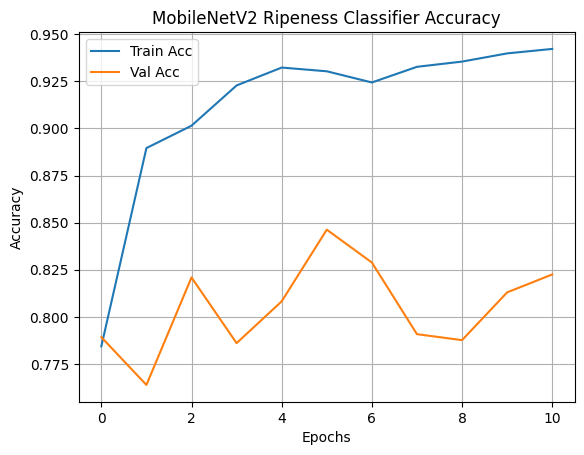


📊 Final Training Accuracy: 94.22%
📊 Final Validation Accuracy: 82.25%

✅ Model saved at: /content/drive/MyDrive/fruit_ripeness_mobilenetv2.h5


In [ ]:
# ✅ Step 1: Install Required Packages
!pip install tensorflow matplotlib --quiet

# ✅ Step 2: Import Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# ✅ Step 3: Paths & Parameters
dataset_path = "/content/drive/MyDrive/ripeness_dataset"  # Ripe/Unripe/Overripe folders
model_save_path = "/content/drive/MyDrive/fruit_ripeness_mobilenetv2.h5"
img_size = (224, 224)
batch_size = 32
num_classes = 3
epochs = 30

# ✅ Step 4: Data Generator with Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    zoom_range=0.3,
    brightness_range=[0.7, 1.3],
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

print("\n✅ Class Indices:", train_gen.class_indices)

# ✅ Step 5: Load Pretrained MobileNetV2 (no top layer)
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model

# ✅ Step 6: Add Custom Classifier on Top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# ✅ Step 7: Compile & Train
model.compile(optimizer=Adam(learning_rate=0.0003), loss='categorical_crossentropy', metrics=['accuracy'])

callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint(model_save_path, save_best_only=True)
]

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=epochs,
    callbacks=callbacks
)

# ✅ Step 8: Plot Accuracy Curve
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("MobileNetV2 Ripeness Classifier Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.savefig("/content/drive/MyDrive/ripeness_training_accuracy.png")
plt.show()

# ✅ Step 8.1: Print Final Training & Validation Accuracy
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"\n📊 Final Training Accuracy: {final_train_acc*100:.2f}%")
print(f"📊 Final Validation Accuracy: {final_val_acc*100:.2f}%")

# ✅ Step 9: Save Final Model
model.save(model_save_path)
print(f"\n✅ Model saved at: {model_save_path}")



Found 114 images belonging to 3 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 35s 10s/step
✅ Test Accuracy: 95.61%


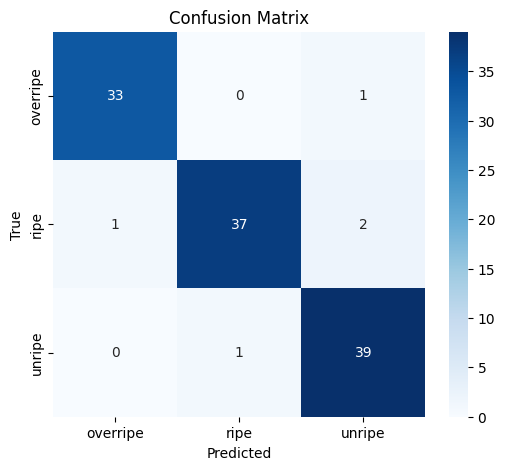

Classification Report:
               precision    recall  f1-score   support

    overripe       0.97      0.97      0.97        34
        ripe       0.97      0.93      0.95        40
      unripe       0.93      0.97      0.95        40

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
# ✅ Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# ✅ Step 2: Paths (Update these according to your dataset & model)
model_path = "/content/drive/MyDrive/fruit_ripeness_mobilenetv2.h5"   # <-- your saved model path
test_dir = "/content/drive/MyDrive/1"                      # <-- your test dataset path

# ✅ Step 3: Load the trained MobileNetV2 model
model = load_model(model_path)

# ✅ Step 4: Prepare test data generator
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),   # MobileNetV2 input size
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# ✅ Step 5: Predictions
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# ✅ Step 6: Test Accuracy
test_accuracy = accuracy_score(y_true, y_pred)
print("✅ Test Accuracy: {:.2f}%".format(test_accuracy * 100))

# ✅ Step 7: Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# ✅ Step 8: Classification Report (Precision, Recall, F1-Score)
report = classification_report(y_true, y_pred, target_names=class_labels)
print("Classification Report:\n", report)
